In [1]:
# -----------------------------------------------------------
# HEART DISEASE PREDICTION USING RANDOM FOREST
# -----------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv(r"C:\Users\kamir\slk projects\Logistic Regression\heart_cleveland_upload-checkpoint.csv")

print("Dataset Loaded Successfully!")
df.head
#Shows first few rows to verify data

Dataset Loaded Successfully!


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
#Display Dataset Columns
#Displays all column names
#Helps ensure correct preprocessing

df.info()
df.isnull().sum()
df.describe()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [4]:
X = df.drop("condition", axis=1)
y = df["condition"]

#x= input
#y=output

In [5]:
X = df.drop("condition", axis=1)
y = df["condition"]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
#Split the Dataset into Train and Test Sets

In [7]:
#Create the Random Forest Model

rf = RandomForestClassifier(
    n_estimators=200,      # number of trees
    max_depth=None,       # allow full tree depth
    random_state=42
)

rf.fit(X_train, y_train)
"""
n_estimators=200

Builds 200 decision trees inside the forest

More trees → better accuracy & stability

🔹 max_depth=None

Allows each tree to grow fully

Trees split until they cannot improve

Can sometimes overfit, but Random Forest handles it well

🔹 random_state=42

Ensures the same result every time

For consistency & debugging
"""


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Random Forest Accuracy: 0.7166666666666667


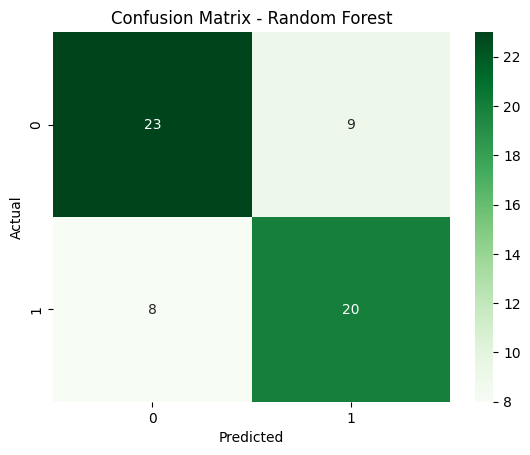


Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.72      0.73        32
           1       0.69      0.71      0.70        28

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.72      0.72      0.72        60



In [8]:
y_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


In [10]:
patient1 = {
    "age": 63,
    "sex": 1,
    "cp": 3,
    "trestbps": 145,
    "chol": 260,
    "fbs": 0,
    "restecg": 1,
    "thalach": 110,
    "exang": 1,
    "oldpeak": 2.5,
    "slope": 1,
    "ca": 2,
    "thal": 3
}
patient2 = {
    "age": 55,
    "sex": 1,
    "cp": 2,
    "trestbps": 130,
    "chol": 240,
    "fbs": 0,
    "restecg": 1,
    "thalach": 150,
    "exang": 0,
    "oldpeak": 1.2,
    "slope": 2,
    "ca": 0,
    "thal": 2
}
patient3 = {
    "age": 45,
    "sex": 0,
    "cp": 1,
    "trestbps": 120,
    "chol": 210,
    "fbs": 0,
    "restecg": 1,
    "thalach": 170,
    "exang": 0,
    "oldpeak": 0.5,
    "slope": 2,
    "ca": 0,
    "thal": 2
}


In [11]:
patients = [patient1, patient2, patient3]

patients_df = pd.DataFrame(patients)
predictions = rf.predict(patients_df)   # or use dt.predict()

for i, result in enumerate(predictions, start=1):
    print(f"Patient {i} Prediction:", 
          "Heart Disease (1)" if result == 1 else "No Heart Disease (0)")


Patient 1 Prediction: Heart Disease (1)
Patient 2 Prediction: Heart Disease (1)
Patient 3 Prediction: No Heart Disease (0)
